# Scatterplots and correlation

In [ ]:
install.packages("fpp3")
library(fpp3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘progressr’, ‘ggdist’, ‘numDeriv’, ‘warp’, ‘BH’, ‘fabletools’, ‘distributional’, ‘slider’, ‘anytime’, ‘fable’, ‘feasts’, ‘tsibble’, ‘tsibbledata’


Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.2 ──

✔ tibble      3.3.0     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.2
✔ lubridate   1.9.4     ✔ fable       0.4.1
✔ ggplot2     4.0.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   mas

To visualy explore two or more time series we use **scatterplots**.

To measure linear relationship between two time series we use **correlation**.

To explore importance of scatterplots and correlation we use ```vic_elec``` dataset.

```vic_elec``` is a half-hourly ```tsibble``` with three values:
* **Demand**:	Total electricity demand in MWh.
* **Temperature**:	Temperature of Melbourne.
* **Holiday**:	Indicator for if that day is a public holiday.

Source: *Australian Energy Market Operator*

[```vic_elect``` documentation](https://search.r-project.org/CRAN/refmans/tsibbledata/html/vic_elec.html)

In [ ]:
head(vic_elec)

Time,Demand,Temperature,Date,Holiday
<dttm>,<dbl>,<dbl>,<date>,<lgl>
2012-01-01 00:00:00,4382.825,21.40,2012-01-01,TRUE
2012-01-01 00:30:00,4263.366,21.05,2012-01-01,TRUE
2012-01-01 01:00:00,4048.966,20.70,2012-01-01,TRUE
2012-01-01 01:30:00,3877.563,20.55,2012-01-01,TRUE
2012-01-01 02:00:00,4036.230,20.40,2012-01-01,TRUE
2012-01-01 02:30:00,3865.597,20.25,2012-01-01,TRUE


### EDA

In [ ]:
interval(vic_elec) # Tells you the gap between consecutive index values

<interval[1]>
[1] 30m

In [ ]:
has_gaps(vic_elec)  # Tells you weather the data has gaps

.gaps
<lgl>
FALSE


In [ ]:
min(vic_elec[["Time"]])

[1] "2012-01-01 AEDT"

In [ ]:
max(vic_elec[["Time"]])

[1] "2014-12-31 23:30:00 AEDT"

In [ ]:
summary(vic_elec[["Demand"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2858    3969    4635    4665    5244    9345 

In [ ]:
summary(vic_elec[["Temperature"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.50   12.30   15.40   16.27   19.40   43.20 

In [ ]:
summary(vic_elec[["Holiday"]])

   Mode   FALSE    TRUE 
logical   51120    1488 

###

### Plot time series

```vic_elec``` consists of two different time series with "Demand", "Temperature" as measure for **three years**. Let's plot them separately using only data for 2012.

In [ ]:
vic_elec |>
  filter(year(Time) == 2012) -> vic_elec_2012

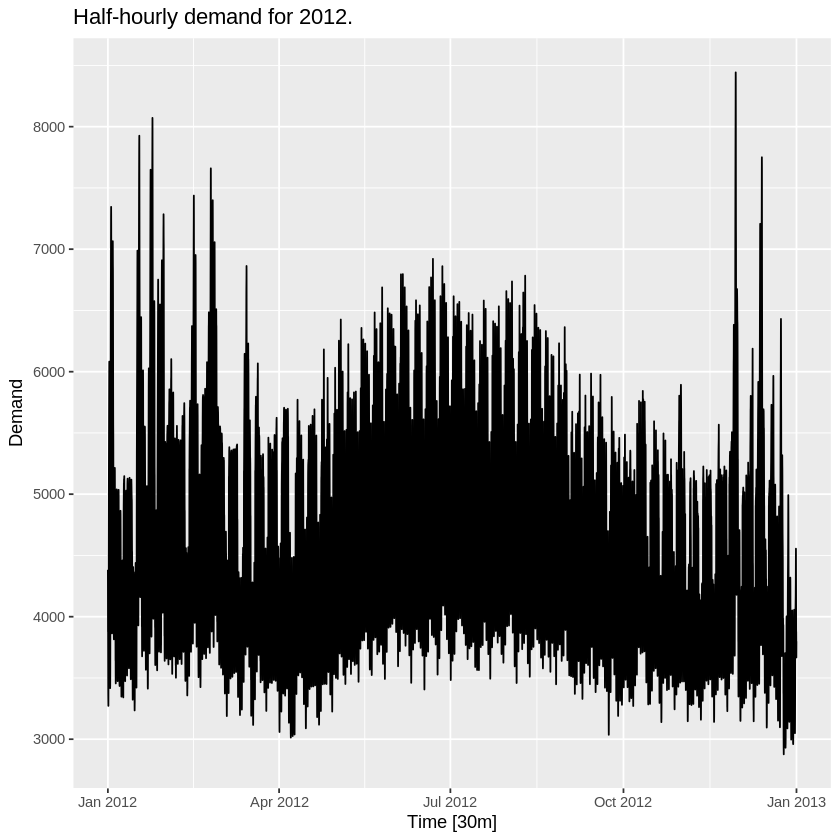

In [ ]:
vic_elec_2012 |>
  autoplot(Demand) +
  labs(
  title = "Half-hourly demand for 2012."
  )

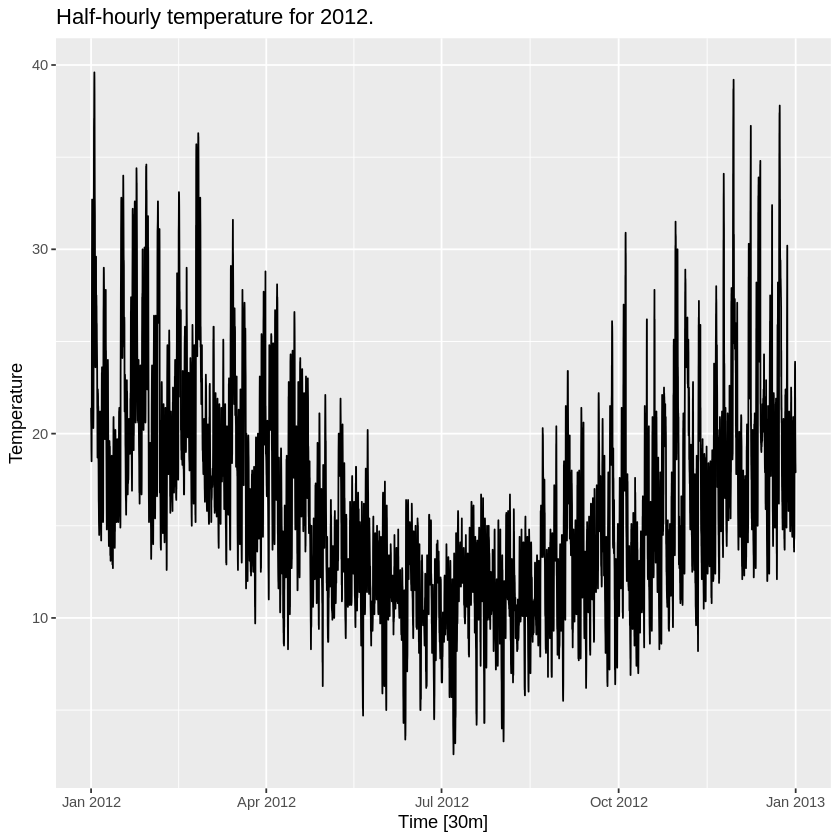

In [ ]:
vic_elec_2012 |>
  autoplot(Temperature) +
  labs(
  title = "Half-hourly temperature for 2012."
  )

We can see that demand is higher if temperature is extremely low or extremely high.

To explore relationship between temperature and demand more deeply, we use scatterplot.

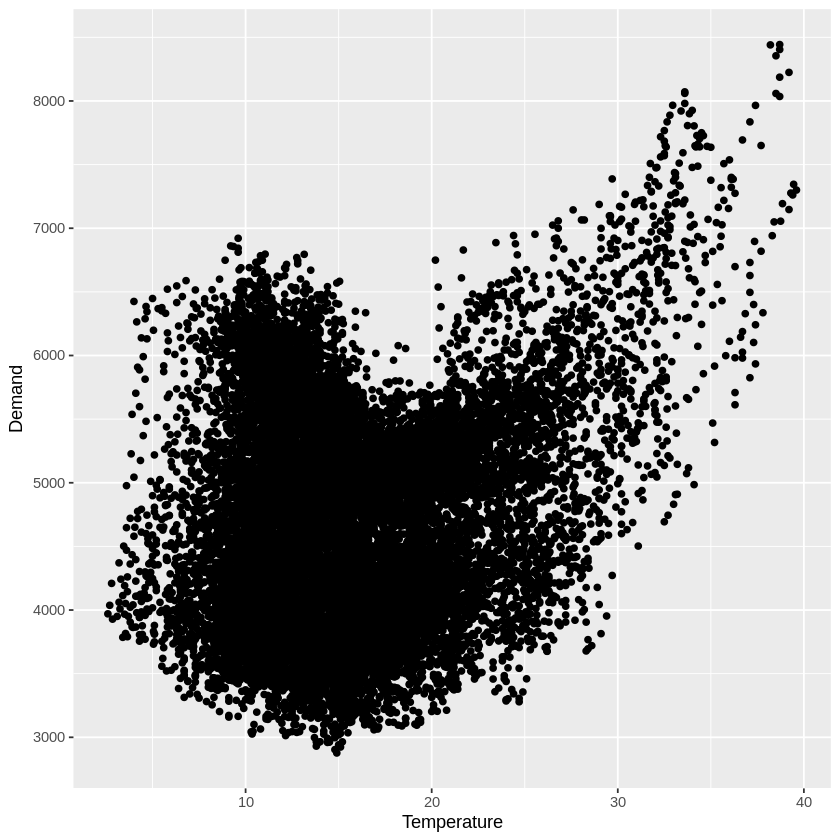

In [ ]:
vic_elec_2012 |>
  ggplot(aes(x = Temperature, y = Demand)) +
  geom_point() +
  labs(
  x = "Temperature", y = "Demand"
  )

### Correlation

**Correlation** measures linear dependency of variables. The value of correlation always lies between -1 and 1 with negative values indicating a negative relationship and positive values indicating a
positive relationship.

Looking at the scaterplot above we can spot that relationship is **not linear**. It seems like:
* **correlation is negative** for temperature below 15 degrees
* **correlation is positive** for temperature above 20 degrees

In [ ]:
cor(vic_elec_2012$Temperature, vic_elec_2012$Demand, use = "complete.obs")

[1] 0.2221758

The correlation between temperature and demand is low (0.22) as we predicted. Let's explore the correlation for lower and higher temperatures separately.

In [ ]:
vic_elec |>
  filter(year(Time) == 2012) |>
  filter(Temperature < 18) -> vic_low_tem

cor(vic_low_tem$Temperature, vic_low_tem$Demand)

[1] -0.0874998

In [ ]:
vic_elec_2012 |>
  filter(Temperature < 15) -> vic_low_tem

cor(vic_low_tem$Temperature, vic_low_tem$Demand)

[1] 0.05374996

There is **negligible negative correlation** for low temperatures.

In [ ]:
vic_elec_2012 |>
  filter(Temperature > 20) -> vic_high_tem

cor(vic_high_tem$Temperature, vic_high_tem$Demand)

[1] 0.5767164

There is a **week positive correlation** (0.68) for high temperatures.

### Influence of Holiday

Let's plot a scatterplot that shows how the relationship of temperature and demand differ on holiday compared to non-holiday.

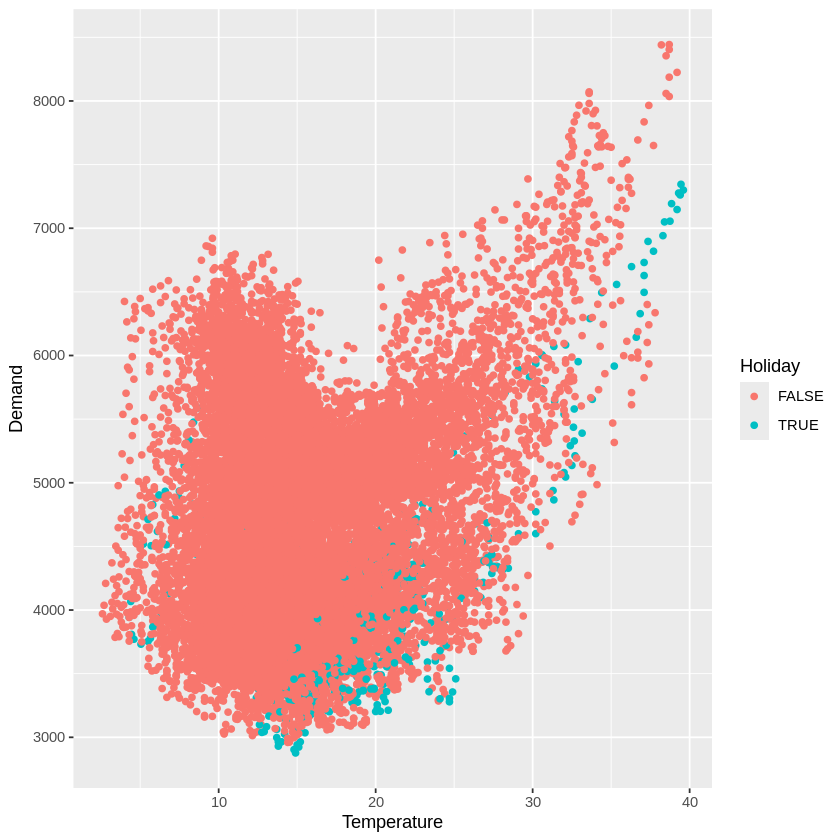

In [ ]:
vic_elec_2012 |>
  ggplot(aes(x = Temperature, y = Demand, colour = Holiday)) +
  geom_point()

To see the relationships between multiple time series in a ```tsible```, we can plot each time series against the others using ```GGally```. These plots can be arranged in a scatterplot matrix (correlation matrix).

In [ ]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’




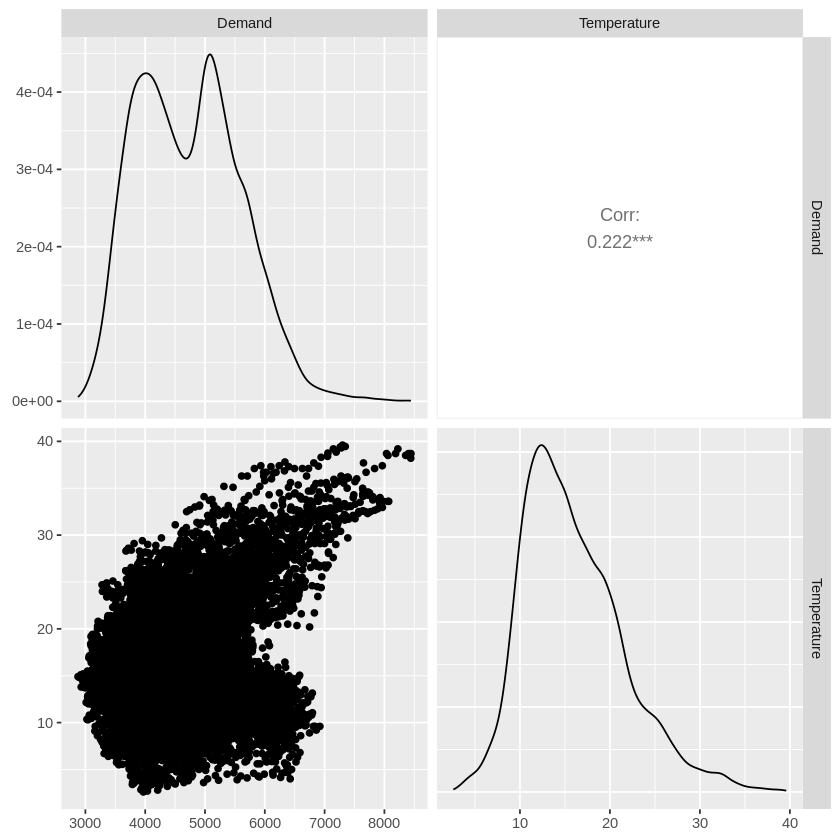

In [ ]:
vic_elec_2012 |>
  GGally::ggpairs(columns = 2:3)

#Recourses:
* Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018. [Online tutorial on Scatterplots](https://otexts.com/fpp3/scatterplots.html)